<a href="https://colab.research.google.com/github/rafapedra/Data_Science_Projects/blob/master/Projeto_Regress%C3%A3o_Rafael_Pedra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto - Regressão
1. Considerações iniciais
Neste notebook vai praticar o desenvolvimento (pipeline) de uma solução utilizando Aprendizado de Máquina (Machine Learning). Mais espeficicamente, iremos criar um algoritmo de regressão utilizando o conjunto de dados usando a biblioteca scikit-learn do Python. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo por inteiro, ou o máximo dele.

De forma bem simples, as etapas são:

Obter nossos dados
Limpar e organizar nossos dados
Explorar e visualizar em busca de padrões ou tendências.
Aplicar um modelo
Interpretar os resultados
1.1. Por que usar o Scikit-Learn?
O ecossistema de bibiotecas do Python voltadas para aprendizado de máquina é vasto e bem consolidado. Uma das mais conhecidas é o scikit-learn, que possui uma grande quantidade de algoritmos de aprendizado de máquina implementados - prontos para o uso. Simples e eficiente, o pacote do scikit-learn permite que o cientista rapidamente treine um modelo e interprete seus resultados.

Além de bem documentado, o scikit-learn também possui um comunidade de usuários bastante ativa, o que acaba refletindo em uma quantidade enorme de tutoriais, notebooks e exemplos pela web. A uniformidade da biblioteca (o processo de entrada e construção de modelos é semelhante) reflete em rapidez no desenvolvimento de soluções, visto que no momento que o usuário entende o fluxo de trabalho, ele rapidamente consegue "chavear" entre diversos modelos. Caso um modelo não esteja indo bem, basta usar outro.

1.2. Prepare seu ambiente
Se necessário, prossiga com a instalação da biblioteca do jeito Python. Sem esforço, use o gerenciador de pacotes da linguagem:

$ pip install scikit-learn
Lembre-se, ninguém brilha sozinho no Python. Pandas, numpy, matplotlib, searborn, etc são exemplos de bibliotecas de apoio. Na verdade, o bom cientista de dados trabalha com várias bibliotecas ao mesmo tempo.

1.3. Conjunto de dados
O conjunto de dados que utilizaremos contém informações sobre diferentes tipos de casas na cidade americana de Boston. Este conjunto de dados foi disponilizado no repositório de Aprendizado de Máquina da UCI. Aqui, o conjunto de dados está no arquivo housing.csv.

Existem 506 amostras e 13 variáveis (colunas) neste conjunto de dados. O objetivo é prever o valor dos preços de casas usando estas variáveis.

1.3.1. Descrição do dados
No conjunto de dados, encontraremos as seguintes variáveis:

CRIM: Taxa de criminalidade per capita no bairro
ZN: Proporção de terrenos residenciais com lotes com mais de 25.000 m2 no bairro
INDUS: Proporção de acres comerciais não comerciais na cidade
CHAS: Variável fictícia Charles River (1 se o terreno é limitado por rio; 0 caso contrário)
NOX: Concentração de óxido nítrico (partes por 10 milhões) na cidade
RM: Número médio de quartos por moradia no bairro
AGE: Proporção de unidades ocupadas em propriedades construídas antes de 1940
DIS: Distâncias ponderadas para cinco centros de emprego em Boston
RAD: Índice de acessibilidade às rodovias
TAX: Taxa de imposto sobre a propriedade de valor total (x10.000)
PTRATIO: Proporcaoo de alunos por professor no bairro
LSTAT: Porcentagem da população considerada classe baixa no bairro
MEDV: Valor médio das casas ocupadas pelos proprietários (x1000)
A nossa variável alvo (que queremos prever) é a MEDV, ou seja, o valor médio das casas. Devemos encontrar um algoritmo que receba as 12 variáveis restantes e preveja o valor de MEDV. É o problema clássico de regressão.

2. Procedimentos
Comece importando as bibliotecas que você irá utilizar ao longo do caminho. Lembre-se que um cientista de dados trabalha com várias ferramentas.


#TAREFA 01
Importe as bibliotecas que você utilizará


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

2.1. Obtendo os dados
Você não pode fazer nada sem dados. Aqui, o conjunto de dados já foi reunido e está em um arquivo CSV. Precisamos carregá-los para dentro do nosso código em um dataframe pandas.

#TAREFA 02
Importe o pandas
Importe o arquivo CSV para dentro de um dataframe chamado houses.
Imprima o cabeçalho do dataframe.

In [2]:
from google.colab import files 
uploaded = files.upload()


Saving houses.csv to houses.csv


In [3]:
df = pd.read_csv('houses.csv',sep=',')
#df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#TAREFA 03
Confirme que o dataframe possui 506 amostras e 13 variáveis


In [4]:
print("o dataframe contém {} amostras e {} variaveis".format(df.shape[0],df.shape[1]))


o dataframe contém 506 amostras e 13 variaveis


2.2. Limpar e organizar os dados
Dados corrompidos, falha ao carregar as informações ou extração incompleta podem gerar no mundo real valores faltantes (missing). Saber lidar com este tipo de situação é importante. Primeiro devemos verificar se o conjunto de dados possui valores missing.



#TAREFA 04
Verifique se existem valores missing em alguma variável.


In [5]:
df[df.isna()].count()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

2.3. Explorar e visualizar em busca de padrões ou tendências.
Vamos continuar a AED, extraindo vários parâmetros estatísticos do conjunto de dados

#TAREFA 05
Gere estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


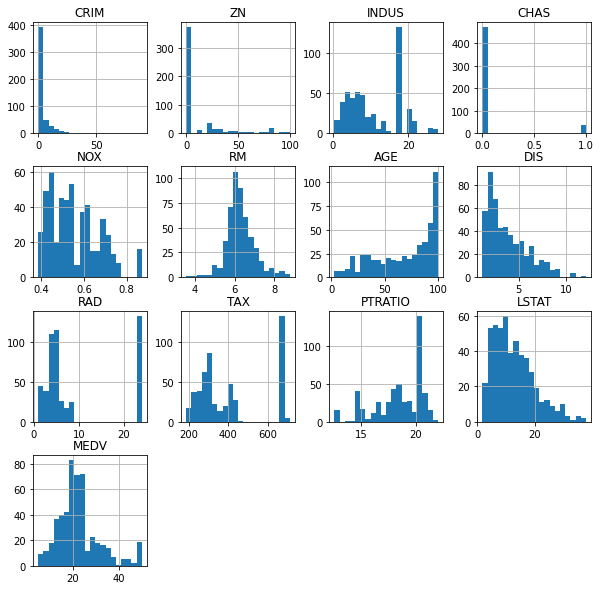

In [6]:
df.hist(figsize=(10,10),bins=20)
df.describe()


Vamos verificar o relacionamento de algumas variáveis preditoras com a variável alvo (MEDV). Neste caso, vamos utilizar 'RM', 'LSTAT', 'PTRATIO'.

#TAREFA 06
Plote a relação das variáveis 'RM', 'LSTAT', 'PTRATIO' com a variável alvo.


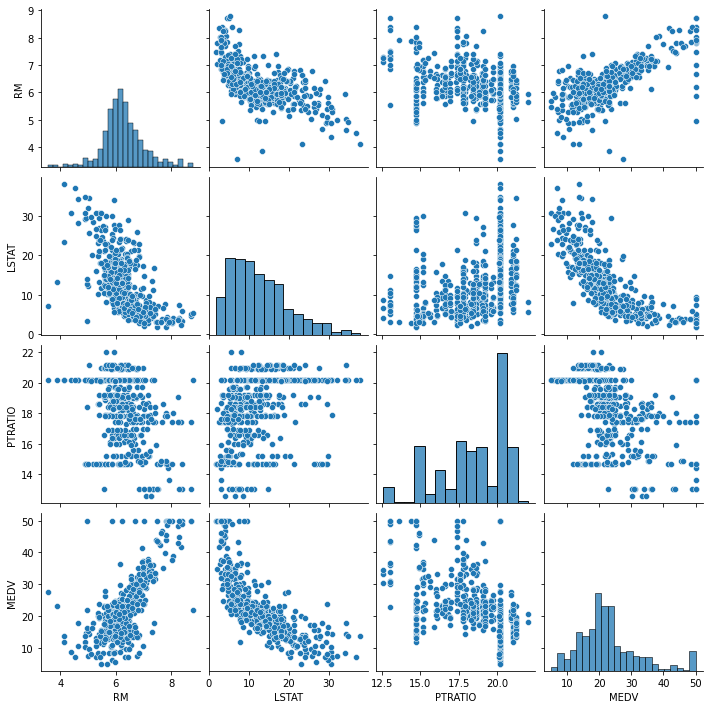

In [7]:
sns.pairplot(df[['RM','LSTAT','PTRATIO','MEDV']])


eja a variável 'RM' e 'MEDV'. Ao que tudo indica, existe uma relação positiva entre a quantidade de quartos e o valor das casas. Quanto mais casas, maior é o valor da casa.

Agora a variável 'LSTAT' e 'MEDV' parece que ocorre o inverso. Quanto maior a quantidade de pessoas consideradas classe baixa no bairro, menor é o valor dos imóveis. Indicando que a casa está em um bairro mais pobre da cidade.

#TAREFA 07
Plote a relação das variáveis de outras variáveis com a variável alvo.
Investigue o quanto quiser.

#TAREFA 08
Extraia a matriz de correlação das variáveis.
Plote a matriz de correlação usando o seaborn.

             CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
CRIM     1.000000       NaN       NaN   NaN       NaN       NaN       NaN   
ZN            NaN  1.000000 -0.533828   NaN -0.516604       NaN -0.569537   
INDUS         NaN -0.533828  1.000000   NaN  0.763651       NaN  0.644779   
CHAS          NaN       NaN       NaN   1.0       NaN       NaN       NaN   
NOX           NaN -0.516604  0.763651   NaN  1.000000       NaN  0.731470   
RM            NaN       NaN       NaN   NaN       NaN  1.000000       NaN   
AGE           NaN -0.569537  0.644779   NaN  0.731470       NaN  1.000000   
DIS           NaN  0.664408 -0.708027   NaN -0.769230       NaN -0.747881   
RAD      0.625505       NaN  0.595129   NaN  0.611441       NaN       NaN   
TAX      0.582764       NaN  0.720760   NaN  0.668023       NaN  0.506456   
PTRATIO       NaN       NaN       NaN   NaN       NaN       NaN       NaN   
LSTAT         NaN       NaN  0.603800   NaN  0.590879 -0.613808  0.602339   

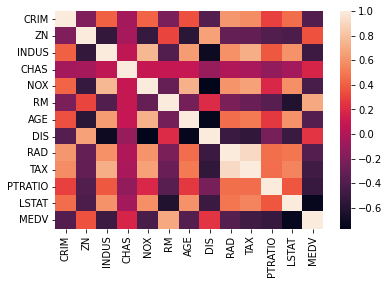

In [8]:
corr = df.corr()
print(corr[(corr > 0.5) | (corr < -0.5)])
sns.heatmap(corr)

O coeficiente de correlação entre as variáveis varia de -1 a 1. Se o valor for próximo de 1, significa que há uma forte correlação positiva entre as duas variáveis. Quando está próximo de -1, as variáveis têm uma forte correlação negativa. Interprete o gráfico!

Devemos ficar atentos aquelas variáveis que possuem forte correlação com o variável alvo, pois elas podem ter peso significativo na performace do nosso modelo. Em Aprendizado de Máquina, esta seleção/exclusão de variáveis preditoras se chamada Feature Selection. Neste passo, o cientista de dados pode escolher remover ou combinar variáveis afim de melhorar (tunning) seu modelo. Não iremos realizar esta etapa por questão de tempo, mas você mesmo pode fazê-la ao término das tarefas.

Vamos analisar melhor a relação das variáveis LSTAT e RM com MEDV?

#TAREFA 09
Plote um gráfico de dispersão de LSTAT e RM com MEDV.
Utilize subplots, matplotlib e seaborn

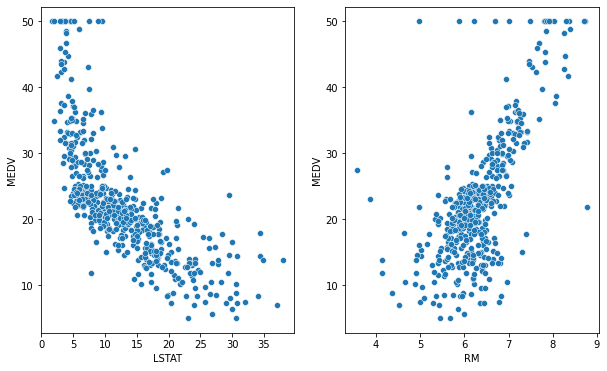

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,6))
sns.scatterplot(ax=axes[0], x='LSTAT',y='MEDV',data=df)
sns.scatterplot(ax=axes[1], x='RM',y='MEDV',data=df)

Confirmando:

Os preços aumentam à medida que o valor de RM aumenta linearmente. Existem poucos valores discrepantes e os dados parecem estar limitados a 50.
Os preços tendem a diminuir com o aumento do LSTAT. Embora não pareça seguir exatamente uma linha linear.
Prosseguindo, vamos analisar a distribuição da variável alvo MEDV.

#TAREFA 10
Plote a distribuição da variável alvo.
Use o seaborn.distplot().

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


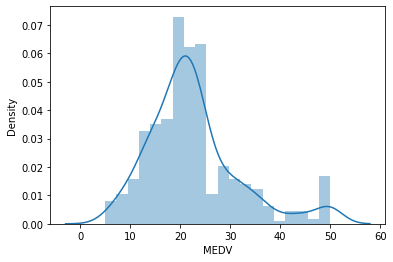

In [10]:
sns.distplot(df.MEDV,bins=20)


Podemos verificar que a variável alvo possui um distribuição próxima a uma normal. Contudo, podemos notar a presenção de alguns outliers em torno de 50.

É tarefa essencial verificar a distribuição não só da variável alvo, como de todo o conjunto. Vamos discrepantes (outliers) podem confundir nosso modelo diminuindo a performance. Esta também é uma tarefa que pode consumir bastante tempo e você é encorajado à fazê-la.

2.4 Aplicar um modelo
Após realizar uma investigação superficial*, vamos prosseguir separando nossos dados de treino e teste. Logo após, vamos treinar nosso modelo.

*Repare que chamamos a etapa anterior de Análise Exploratória de Dados, mas a verdade é que nem chegamos perto compreender totalmente o conjunto de dados. O que é normal, pois estamos querendo em entender o processo e não em exaurir o assunto.

#TAREFA 11
Separe os dados em treino e teste.
Utilize 80% do dados para treino.
DICA: Use a função train_test_split() do scikit-learn

In [11]:
train, test = train_test_split(df,train_size=0.8)

X_train, X_test, y_train, y_test = train_test_split(df[['LSTAT','RM']], df['MEDV'], train_size=0.8, random_state=1)

FINALMENTE o grande momento de treinar um algoritmo de Aprendizado de Máquina. Neste caso, vamos utilizar a Regressão Linear. Não entrarei em detalhes, mas a regressão linear basicamente gera uma equação que irá descrever a relação estatística entre as variáveis preditoras e a variável alvo. A Regressão Linear encontrará a linha que melhor representa as variáveis de entrada (X) com a variável de saída (Y).

#TAREFA 12
Use o algoritmo de Regressão Linear para treinar um modelo
Passe os dados de treino de X e Y para o modelo.

In [12]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

im, com algumas linhas de código você tem um modelo treinado no scikit-learn. Percebeu que gastamos mais tempo preparando e entendendo os dados do que treinando o modelo? Muito bom não é! É exatamente assim que o cientista de dados gasta a maior parte do seu tempo - preparando e entendendo os dados.

2.5. Interpretar os resultados
Vamos verificar a performance do nosso modelo.

#TAREFA 13
Utilize os dados de treino para prever a variável alvo.
Como métrica de performance, utilize o score R^2

In [13]:
reg.score(X_train, y_train)


0.6251836356449056

#TAREFA 14
Utilize os dados de teste para prever a variável alvo.
Como métrica de performance, utilize o score R^2

In [14]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.6753556251471677

3. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.
